## The Spark Foundation
### Internship: Task 3
#### Name : B.R.Vishnu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("C:\\Users\\brvis\\Downloads\\Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Lets drop the "Id" column as it does is just an index and we already have the inbuilt indexing for dataframes

In [7]:
df.drop("Id",axis=1,inplace=True)

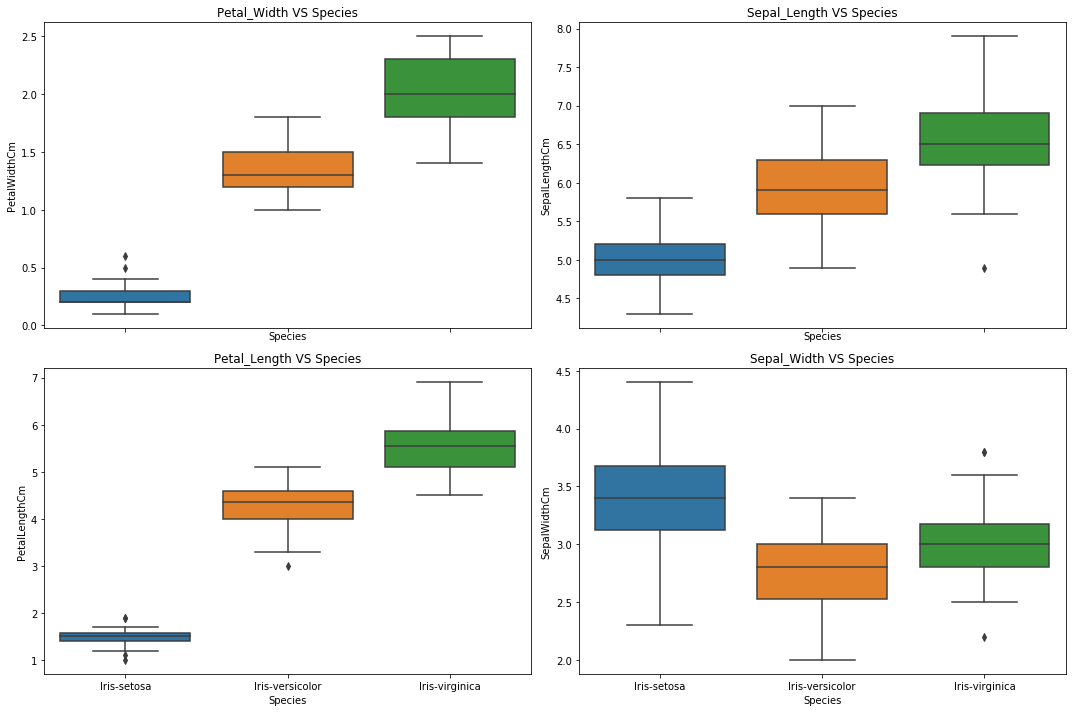

In [8]:
fig,ax=plt.subplots(2,2, figsize = (15, 10),sharex=True)
sns.boxplot(x="Species",y="PetalWidthCm",data=df,ax=ax[0][0])
ax[0][0].set_title("Petal_Width VS Species")
sns.boxplot(x="Species",y="SepalLengthCm",data=df,ax=ax[0][1])
ax[0][1].set_title("Sepal_Length VS Species")
sns.boxplot(x="Species",y="PetalLengthCm",data=df,ax=ax[1][0])
ax[1][0].set_title("Petal_Length VS Species")
sns.boxplot(x="Species",y="SepalWidthCm",data=df,ax=ax[1][1])
ax[1][1].set_title("Sepal_Width VS Species")
plt.tight_layout()
plt.show()

### train and test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=df.drop("Species",axis=1)
y=df["Species"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### decision tree model 

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree=DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
predict_tree=dtree.predict(X_test)

### model validation

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,predict_tree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [19]:
print(confusion_matrix(y_test,predict_tree))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


### Visualising a decision tree

In [20]:
from sklearn.tree import plot_tree

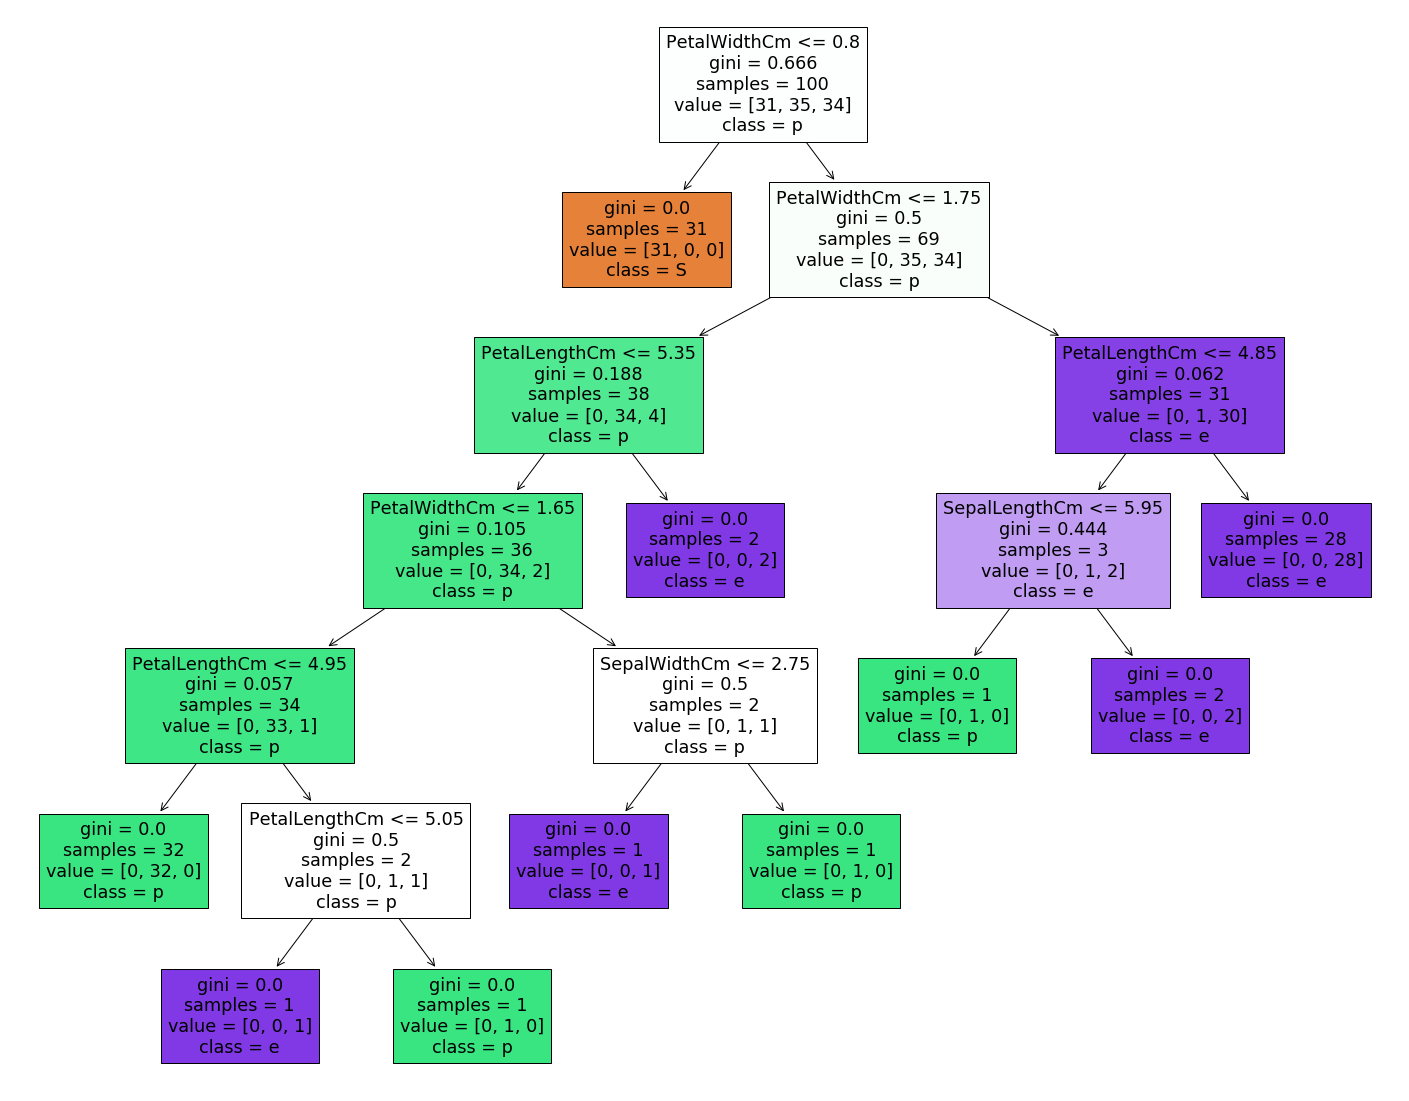

In [21]:
fig = plt.figure(figsize=(25,20))
plot_tree(dtree,feature_names=X.columns,  
                   class_names="Species",
                   filled=True)
plt.show()